<a href="https://colab.research.google.com/github/duberii/pid-playground/blob/main/activities/Cherenkov_Radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cherenkov Radiation**
---
Welcome to Particle Identification Playground! This activity is designed to introduce you to Cherenkov detectors and how they are used to identify particles.
**Before attempting this notebook, complete all of the activities in the Getting Started section.**

**By the end of this notebook, you should be able to:**
*   Explain the mechanism of Cherenkov radiation
*   Demonstrate the separation power of Cherenkov radiation analysis using ROOT’s TH2D class
*   Classify different charged particles based on their Cherenkov radiation at fixed momentum

In [8]:
#@title Run this cell before starting.
import pandas as pd
import numpy as np

---
##**Sonic Booms**
---
When an object (usually a high-speed plane) moves through air faster than the speed of sound, something interesting happens. The plane starts making a noise that sounds like an explosion, which we call a **sonic boom**.

Before we talk about what causes a sonic boom, we have to understand what causes sound. Whenever an object moves through air, it has to shove the air out of its way to clear its path. This causes the air around the object to become compressed. This compression travels as a wave away from the object, which we perceive as sound. The speed that this wave moves away is what we call the speed of sound.

When an object is moving faster than the speed of sound, this effect becomes much more extreme. Because the object is moving faster than the speed of sound, the air is pushed out of the way faster than it wants to move, which creates an extremely large sound wave. On top of that, the object is constantly moving away from these waves and pushing new air out of the way, which creates additional waves of compressed air. A sonic boom is the result of all of these waves overlapping to create an even bigger wave.

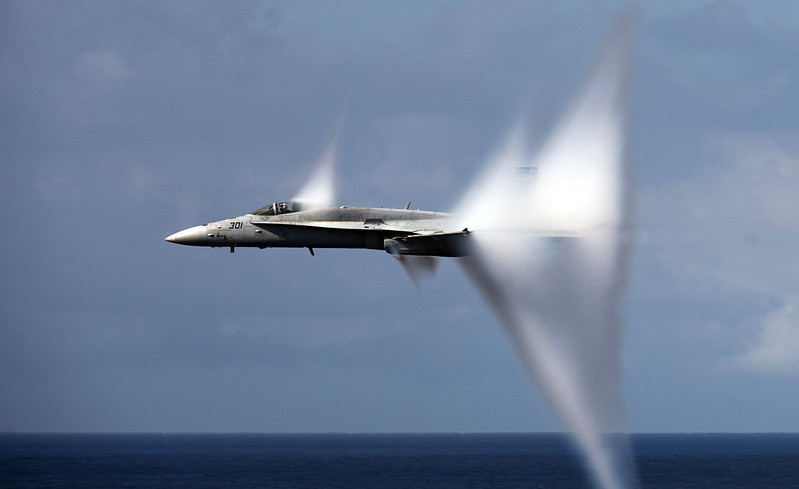

(U.S. Navy photo by Mass Communication Specialist 3rd Class Travis K. Mendoza/Released)

As the object moves, it keeps emitting waves that travel away from the plane. The waves emitted earlier have more time to spread out, while the waves emitted later don't have as much time to spread out, which produces the cone shape, as shown in the image below. Each of the circles behind the plane represents a sound wave, and the image shows the sound waves that were created first are more spread out than the ones created later (which are closer to the plane).

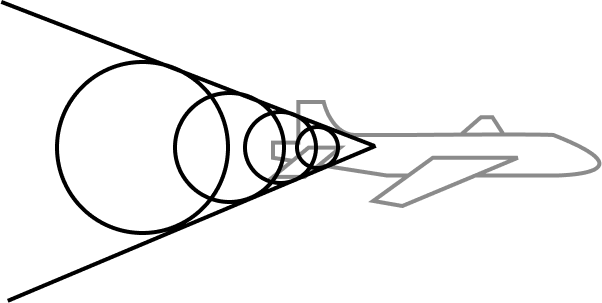

An important quantity for sonic booms is called the **Mach angle**, and it refers to the angle between the path of the plane and the cone, labeled $\theta$ in the image shown below.

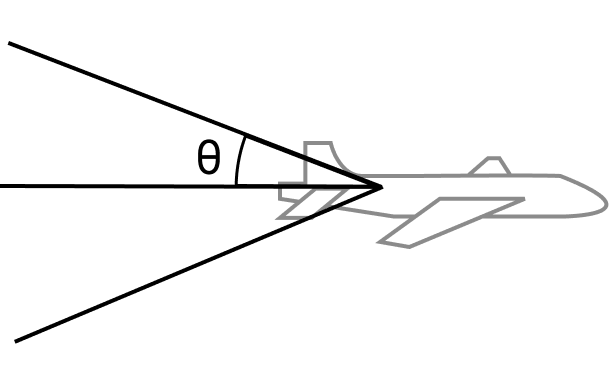

####**Question #1a:**
---
Suppose the plane produces a sound wave at time $0$, and we look at it $t$ seconds later. If the speed of sound is $v_{sound}$, how far has the wave traveled since it was created?

Double click to edit this cell and answer the following question: If the speed of sound is $v_{sound}$, how far has the wave traveled since it was created?

#####**Solution:**

The distance that the wave traveled is given by the equation $$
d_{sound} = v_{sound} * t
$$
where $d_{sound}$ is the distance the wave has traveled, $v_{sound}$ is the velocity of the sound wave, and $t$ is the time that has passed.

####**Question #1b:**
---
If the plane moves at a constant velocity $v_{plane}$, how far has the plane traveled after time $t$?

Double click to edit this cell and answer the following question: If the plane moves at a constant velocity $v_{plane}$, how far has the plane traveled after time $t$?

#####**Solution:**

The distance that the plane traveled is given by the equation $$
d_{plane} = v_{plane} * t
$$
where $d_{plane}$ is the distance the plane has traveled, $v_{plane}$ is the velocity of the plane, and $t$ is the time that has passed.

####**Question #1c:**
---
What is the relationship between the Mach angle $\theta$, and the two distances from Questions #1a and #1b?

Double click to edit this cell and answer the following question: What is the relationship between the Mach angle $\theta$, and the two distances from Questions #1a and #1b?

#####**Hint:**

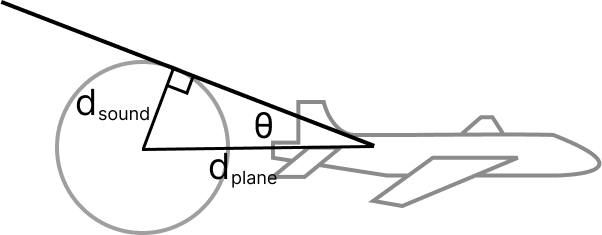

#####**Solution:**

Recall that the sine of an angle is equal to the length of the side opposite of it divided by the length of the hypotenuse. In our case, $$
\sin \theta = \frac{d_{sound}}{d_{plane}}
$$
From Question #1a, we have $d_{sound} = v_{sound} * t$ and from Question #1b, we have $d_{plane} = v_{plane} * t$. Plugging this into the equation shown above, we get:
$$
\sin \theta = \frac{v_{sound}*t}{v_{plane}*t}
$$
Because $t$ appears in both the numerator and the denominator, we can cancel it out to get:
$$
\sin \theta = \frac{v_{sound}}{v_{plane}}
$$
If we apply inverse sine on both sides, we get: $$
\theta = \sin^{-1}\left ( \frac{v_{sound}}{v_{plane}} \right )
$$

One interesting property of this equation is that the larger the velocity of the plane, the smaller the Mach angle.

---
##**Cherenkov Radiation**
---
**Cherenkov radiation** is essentially just a sonic boom of light. In all of the definitions, we just need to replace "sound" with "light". Cherenkov radiation is emitted when a particle moves faster than the speed of light in a material. Cherenkov radiation is responsible for the blue glow that is often seen near underwater nuclear reactors.

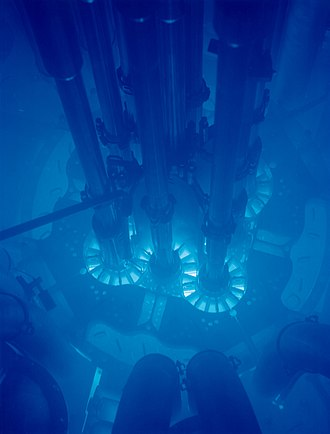

(["Advanced Test Reactor core, Idaho National Laboratory"](https://www.flickr.com/photos/35734278@N05/3954062594/) by Idaho National Laboratory/ [CC BY-NC-SA 2.0](https://creativecommons.org/licenses/by-nc-sa/2.0/))

How can a particle move faster than the speed of light in a material? While it is true that nothing can move faster than the speed of light in empty space, all materials cause light to move slower. For example, light travels at about $3*10^8$ meters per second in empty space. However, in water, light travels at about $2.2*10^8$ meters per second. In a diamond, light only travels at $1.25*10^8$ meters per second.

Because these numbers are so large, they are usually annoying to work with. Instead, we often refer to a material by its **refractive index**, which is defined as: $$
n = \frac{c}{v_{light}}
$$
where $n$ is the refractive index, $c$ is the speed of light in empty space, and $v_{light}$ is the speed of light in the material. Using the refractive index, we can say that the refractive index of water is $n=1.33$, and the refractive index of diamond is $n=2.47$.

Because light slows down in different materials, it is definitely possible for particles to travel faster than the speed of light in a material, as long as they don't move faster than the speed of light in empty space.

####**Question #2a:**
---
Suppose the particle produces a wave of light at time $0$, and we look at it $t$ seconds later. If the speed of light in the material is $v_{light}$, how far has the wave traveled since it was created?

Double click to edit this cell and answer the following question: If the speed of light is $v_{light}$, how far has the wave traveled since it was created?

#####**Solution:**

The distance that the wave traveled is given by the equation $$
d_{light} = v_{light} * t
$$
where $d_{light}$ is the distance the wave has traveled, $v_{light}$ is the velocity of the wave of light, and $t$ is the time that has passed.

####**Question #2b:**
---
If the particle is traveling with a constant velocity $v_{particle}$, how far has the particle traveled in $t$ seconds?

Double click to edit this cell and answer the following question: If the particle is traveling with a constant velocity $v_{particle}$, how far has the particle traveled in $t$ seconds?

#####**Solution:**

The distance that the particle traveled is given by the equation $$
d_{particle} = v_{particle} * t
$$
where $d_{particle}$ is the distance the particle has traveled, $v_{particle}$ is the velocity of the particle, and $t$ is the time that has passed.

####**Question #2c:**
---
The **Cherenkov angle**, given the symbol $\theta_c$, is similar to the Mach angle. However, the Cherenkov angle refers to a different angle in the right triangle formed by the path of the particle and the cone of light it emits. Based on the diagram shown below, find an expression for the Cherenkov angle ($\theta_c$) in terms of $d_{light}$ and $d_{particle}$.

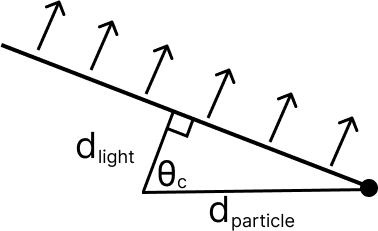

In the image shown above, the arrows show the direction that light is emitted. Note that $\theta_c$ is the angle between $d_{light}$ and $d_{particle}$.

Double click to edit this cell and answer the following question: Based on the equation given above, what should the equation for the Cherenkov angle be?

#####**Solution:**

Recall that the cosine of an angle is equal to the length of the side adjacent to it divided by the length of the hypotenuse. In our case, $$
\cos \theta_c = \frac{d_{light}}{d_{particle}}
$$
From Question #2a, we have $d_{light} = v_{light} * t$ and from Question #2b, we have $d_{particle} = v_{particle} * t$. Plugging this into the equation shown above, we get:
$$
\cos \theta_c = \frac{v_{light}*t}{v_{particle}*t}
$$
Because $t$ appears in both the numerator and the denominator, we can cancel it out to get:
$$
\cos \theta_c = \frac{v_{light}}{v_{particle}}
$$
If we apply inverse cosine on both sides, we get: $$
\theta_c = \cos^{-1}\left ( \frac{v_{light}}{v_{particle}} \right )
$$

####**Question #2d:**
---
Solve the equation for the index of refraction for $v_{light}$. Then, use this expression to find an expression for $\theta_c$ in terms of the index of refraction $n$ and the relativistic quantity $\beta$.

**Hint:** $\beta = v_{particle}/c$

Double click to edit this cell and answer the following question: What is the equation for $\theta_c$ in terms of the index of refraction $n$ and the relativistic quantity $\beta$?

#####**Solution:**

The equation for index of refraction states that $n=c/v_{light}$. If we multiply by $v_{light}$ on both sides, we get: $$
c= n * v_{light}
$$ If we divide by $n$ on both sides, we get: $$
v_{light} = \frac{c}{n}
$$ If we plug this into the equation from Question #3a, we get:$$
\theta_c = \cos^{-1}\left ( \frac{c/n}{v_{particle}} \right )
$$ Simplifying, we get: $$
\theta_c = \cos^{-1}\left ( \frac{c}{n*v_{particle}} \right )
$$ Notice that $c/v_{particle}= 1/\beta$, so we can write: $$
\theta_c = \cos^{-1}\left ( \frac{1}{n* \beta} \right )
$$

####**Question #3a:**
---
If a material has an index of refraction $n$, what is the speed of light in that material in terms of $n$ and $c$?

**Hint:** $n= \dfrac{c}{v_{light}}$

Double click to edit this cell and answer the following question: If a material has an index of refraction $n$, what is the speed of light in that material in terms of $n$ and $c$?

#####**Solution:**

The equation for index of refraction states that $n=c/v_{light}$. If we multiply by $v_{light}$ on both sides, we get: $$
c= n * v_{light}
$$ If we divide by $n$ on both sides, we get: $$
v_{light} = \frac{c}{n}
$$

####**Question #3b:**
---
A charged particle only emits Cherenkov radiation if its speed is greater than the speed of light in a material. We can express

**Hint:** $n= \dfrac{c}{v_{light}}$

Double click to edit this cell and answer the following question: If a material has an index of refraction $n$, what is the speed of light in that material in terms of $n$ and $c$?

#####**Solution:**

The equation for index of refraction states that $n=c/v_{light}$. If we multiply by $v_{light}$ on both sides, we get: $$
c= n * v_{light}
$$ If we divide by $n$ on both sides, we get: $$
v_{light} = \frac{c}{n}
$$

---
##**Measuring Cherenkov Angle**
---
If we want to use these Cherenkov angles to identify particles, we need a way to detect the Cherenkov radiation and calculate the angle between the path of a charged particle and the emitted radiation. The most common type of detector used to measure the Cherenkov angle is called a **Ring Imaging Cherenkov (RICH)** detector, and it uses the fact that Cherenkov radiation is emitted in a cone. GlueX, however, uses a detector called a **Detection of Internally Reflected Cherenkov light (DIRC)** detector, which "captures" this light and reflects it towards a photon detector. Because of the way this detector is set up, we destroy the perfect "ring" that is formed by the Cherenkov radiation. Therefore, instead of using the Cherenkov angle, we calculate how likely it is for each possible particle to produce the signal we detected, and compare these likelihood values.

####**Question #3:**
---
RICH detectors have two main components: a radiator and a photon detector. The radiator is a thin layer of material in which the particle emits the Cherenkov radiation. The photon detector is where we actually detect the Cherenkov radiation. When a charged particle passes through the radiator, it emits Cherenkov radiation in a ring around it, which we detect as a circle on our photon detector. Suppose we detect a ring of light with radius $r$ in our photon detector, which is a distance $d$ away from the radiator. Using the picture below, what is the value of $\theta_c$?

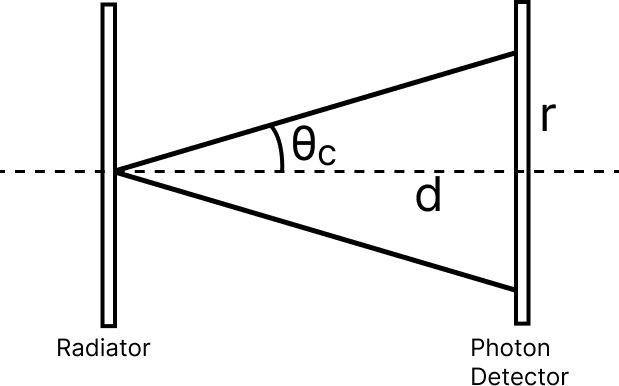

Double click to edit this cell and answer the following question: What is the value of $\theta_c$ in terms of $r$ and $d$?

#####**Solution:**

Using the fact that the distance $d$ and radius $r$ form a right triangle, we can relate these two distances to the Cherenkov angle $\theta_c$ using a trigonometric function. In our case, we don't know the length of the hypotenuse, so we will use the tangent function. The tangent of an angle is equal to the length of the side opposite the angle divided by the length of the side adjacent to the angle. In our case, the radius $r$ is opposite the angle, and the distance $d$ is adjacent to our angle. Therefore: $$
\tan \theta_c = \frac{r}{d}
$$ Applying the inverse tangent function to both sides, we get: $$
\theta_c = \tan^{-1} \left ( \frac{r}{d} \right )
$$
Because $r$ is something we measure and $d$ is something we know from the design of the detector, this is the way we are able to measure the Cherenkov angle.

---
##**Using Cherenkov Radiation for PID**
---
In this section, we will apply the formulas from the previous parts to identify particles using the Cherenkov radiation they emit. For a RICH detector, you would use the Cherenkov angle directly to identify particles. However, for a DIRC detector, it is much harder to calculate the Cherenkov angle, so we use simulations to figure out the signal that a possible particle would leave in the detector, and compare the simulated signal to the signal we detected. Using this comparison, we can calculate how likely it is that the signal we are looking at was created by that particle.

The image below shows the pattern created by simulating the light reflected by the DIRC detector. This is the type of pattern that is compared to the observed pattern in order to calculate a likelihood value.

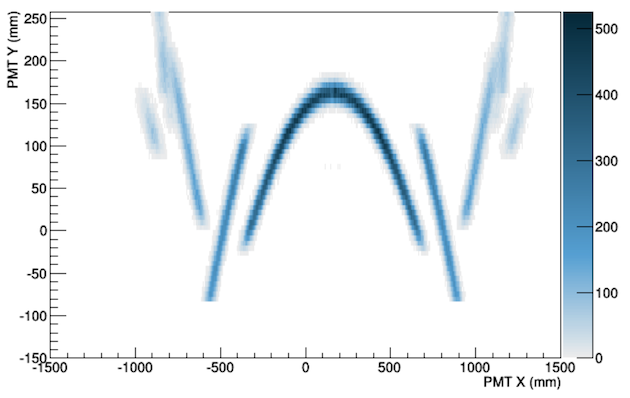

(Photo taken from [The GLUEX DIRC Project](https://arxiv.org/pdf/1606.05645.pdf) by J Stevens Et al.)

Although this seems complicated to do, this comparison is done while the detector is formatting the data files. All that remains for us to do is to pick the most likely particle by comparing the likelihood values. Likelihood values range between 0 and 1 and represent the "probability" that the particle we are looking at is the particle we are comparing it to.

In the data files we get from the detector, the "likelihoods" that are recorded are actually **log likelihoods**, which allow us to more accurately record any small differences between two different likelihood values. Log likelihood is calculated from likelihoods as follows: $$
(\mbox{log likelihood}) = \log \left ( \mbox{likelihood} \right )
$$
However, it turns out that we can compare log likelihoods exactly like we'd compare normal likelihoods, so we just need to find the particle hypothesis with the largest log likelihood.

####**Question #4:**
---
If we take a row from a dataframe that contains all of the various likelihood values (and store it in the variable `particle`), we can compare the likelihood values to identify the particle that interacted with the DIRC detector. The column names for these different likelihoods are shown in the table below. Complete the function in the cell below to identify particles by finding the particle with the largest log likelihood.

| <h6><b>Column Name </b></h6>   | <h6><b>Meaning</b></h6>              	|
|:------------------------------:|:--------------------------------------:|
|                <h6>lele</h6>   | <h6>Log likelihood for electron</h6>  	|
|                 <h6>lpi</h6> 	 | <h6>Log likelihood for pion</h6>     	|
|                  <h6>lk</h6> 	 | <h6>Log likelihood for kaon</h6>     	|
|                  <h6>lp</h6> 	 | <h6>Log likelihood for proton</h6>   	|

In [ ]:
def identify_particle(particle):
  if #Complete this code
    return "Proton"
  elif #Complete this code
    return "Kaon"
  elif #Complete this code
    return "Pion"
  elif #Complete this code
    return "Electron"

#####**Solution:**

**Note:** This is just one way to complete this function! As long as you are creating conditional statements that check if the likelihood is larger than all of the others, your function will work!

In this solution, I will check to see if the hypothesis we are considering is larger than the maximum of all of the other hypotheses. For example, the condition:
```
particle['lp'] > max(particle['lk'], particle['lpi'],particle['lele'])
```
will check if the proton likelihood is larger than all of the other likelihood values. Applying this to the function in the problem, we get:

In [ ]:
def identify_particle(particle):
  if particle['lp'] > max(particle['lk'], particle['lpi'],particle['lele']):
    return "Proton"
  elif particle['lk'] > max(particle['lp'], particle['lpi'],particle['lele']):
    return "Kaon"
  elif particle['lpi'] > max(particle['lk'], particle['lp'],particle['lele']):
    return "Pion"
  elif particle['lele'] > max(particle['lk'], particle['lp'],particle['lpi']):
    return "Electron"

Unlike the other PID methods, using Cherenkov radiation (at least from DIRC detectors) doesn't involve any cool plots or visuals. In later notebooks, we will compare the performance of PID using Cherenkov radiation to the performance of other PID methods.